In [7]:
import sys
sys.path.append("../model/clustering/")
sys.path.append("../utils/")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from gaussian_mixture_model import GMM

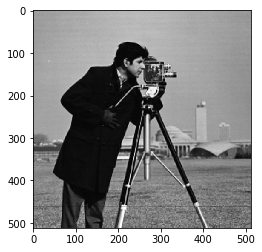

In [8]:
# Load sample image
imsample_cameraman = cv2.imread("../asset/cameraman.png").astype(np.uint8)

plt.imshow(imsample_cameraman)

In [14]:
# Plot
def funcGaussian(x, mu, sigma):
    return (np.exp(-.5*(x - mu)**2./sigma**2.)
            / np.sqrt(2.*np.pi*sigma**2.) )


def drawGMM(x, y, prior, theta):
    # Define plot components 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    # Vectorize input
    vec = x.astype(np.uint8).ravel()
    vrange = (vec.min()+1, vec.max()-1)

    # Get histogram bins
    bins = np.linspace(vrange[0], vrange[1], vrange[1]-vrange[0]+1)

    # Plot histogram
    axes[0].hist(vec, vrange[1], vrange, density=True, color="gray")
    
    # Build Gaussian mixture
    mixedDist = np.zeros_like(bins)
    for n in range(len(prior)):
        gaussian = prior[n]*funcGaussian(bins, theta[n][0], theta[n][1])
        mixedDist += gaussian
        axes[0].plot(bins, gaussian, color="green", linewidth=1, linestyle=":")

    # Plot Gaussian mixture
    axes[0].plot(bins, mixedDist, color="gold", linewidth=3)

    # Plot region
    yy = 255*(y - y.min())/(y.max() - y.min())   
    axes[1].imshow(yy, cmap="Greys")
    
    plt.show()



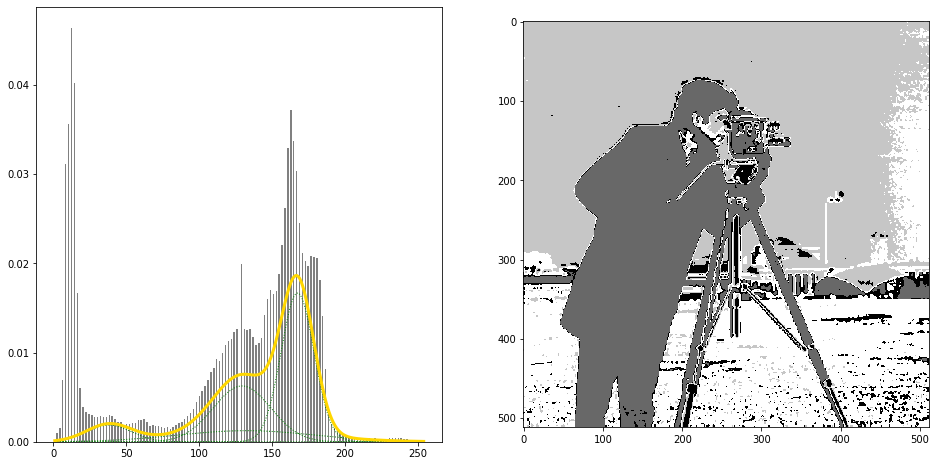

In [15]:
## Gaussian mixture model for image domain clustering

# Add seed points
image = imsample_cameraman[..., 0]
seed = np.zeros_like(image)

# Define model
model = GMM(numCls=4, maxIter=100)

# Run
region, prior, theta = model.run(image)

# Plot
drawGMM(image, region, prior, theta)